In [6]:
print(df.columns)


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


First 5 rows of the dataset:
     id         game sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74681 non-null  int64 
 1   game       74681 non-null  object
 2   sentiment  74681 non-null  object
 3   text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None

Missing Values:
id     

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sudip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sudip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sudip\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sudip\AppData\Roaming\nltk_data...
C:\Users\sudip\AppData\Local\Temp\ipykernel_23984\882001373.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='predicted_sentiment', data=df, palette='viridis')


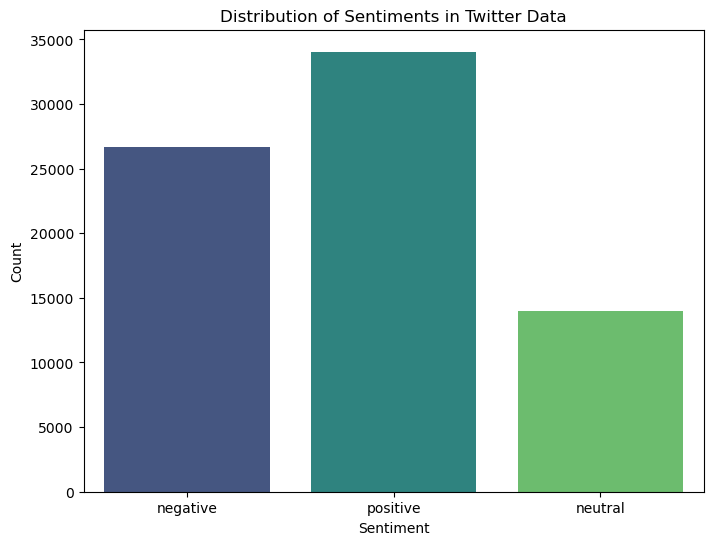


Sentiment Counts:
predicted_sentiment
positive    34047
negative    26684
neutral     13950
Name: count, dtype: int64


In [8]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('twitter.csv')

# Rename columns for better understanding
df.columns = ['id', 'game', 'sentiment', 'text']

# Display the first few rows to confirm
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# Preprocess the data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', str(text)) # Remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    return ' '.join(lemmatized_tokens)

df['cleaned_text'] = df['text'].apply(preprocess_text)

# Perform Sentiment Analysis using VADER
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = sia.polarity_scores(text)
    if scores['compound'] > 0.05:
        return 'positive'
    elif scores['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

df['predicted_sentiment'] = df['cleaned_text'].apply(get_sentiment)

# Visualize Sentiment Patterns
plt.figure(figsize=(8, 6))
sns.countplot(x='predicted_sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiments in Twitter Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

print("\nSentiment Counts:")
print(df['predicted_sentiment'].value_counts())
